In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
matplotlib.rcParams.update({'font.size': 18})

In [4]:
c = pd.read_csv("time_cellranger.csv")
k1 = pd.read_csv("time_kallisto_step1_bus.csv")
k2 = pd.read_csv("time_kallisto_step2_correct_count.csv")
star = pd.read_csv("time_star.csv")
salmon = pd.read_csv("time_salmon.csv")
salmon_nwl = pd.read_csv("time_salmon_nowhitelist.csv")

seq_depth=pd.read_csv("seq_depth_stat.csv")
seq_depth.index = seq_depth["ID"]

In [5]:
seq_depth

,ID,reads
ID,,
EMTAB7320_v2,EMTAB7320_v2,335147976
heart1k_v2,heart1k_v2,88872840
heart1k_v3,heart1k_v3,84512390
hgmm10k_v3,hgmm10k_v3,721180737
hgmm1k_v2,hgmm1k_v2,75225120
hgmm1k_v3,hgmm1k_v3,63105786
neuron10k_v3,neuron10k_v3,357111595
pbmc10k_v3,pbmc10k_v3,638901019
pbmc1k_v3,pbmc1k_v3,66601887


In [6]:
k1.index=k1.ID
k2.index=k2.ID
k = k1 + k2
del k["ID"]

In [7]:
k = k.reset_index()

In [8]:
k["max_rss"] = pd.concat([k1["max_rss"], k2["max_rss"]], axis=1).max(axis=1).values

In [9]:
k.s[0] == k1.s[0] + k2.s[0]

True

In [10]:
c["reads"] = c.ID.map(seq_depth["reads"])
k["reads"] = k.ID.map(seq_depth["reads"])
star["reads"] = star.ID.map(seq_depth["reads"])
salmon["reads"] = salmon.ID.map(seq_depth["reads"])
salmon_nwl["reads"] = salmon_nwl.ID.map(seq_depth["reads"])

In [13]:
k.head()

,ID,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,reads
0,EMTAB7320_v2,994.4588,0:14:180:02:16,3539.60,7665.74,6935.64,6936.63,42655.92,13799.55,0,335147976
1,heart1k_v2,285.1943,0:04:080:00:36,3482.91,7660.74,6875.66,6876.68,7132.03,1812.71,0,88872840
2,heart1k_v3,283.7067,0:02:280:02:14,11089.57,15991.73,14567.84,14568.83,5247.34,1659.21,0,84512390
3,hgmm10k_v3,1620.3424,0:19:560:07:04,11461.04,20136.83,18789.62,18790.60,49292.68,30749.70,0,721180737
4,hgmm1k_v2,193.5088,0:02:330:00:39,7264.75,11738.47,10954.49,10955.48,9431.13,1632.67,0,75225120


In [14]:
kallisto = k
cellranger = c
salmon_whitelist = salmon
star = star
salmon_nowhitelist = salmon_nwl

# MEMORY

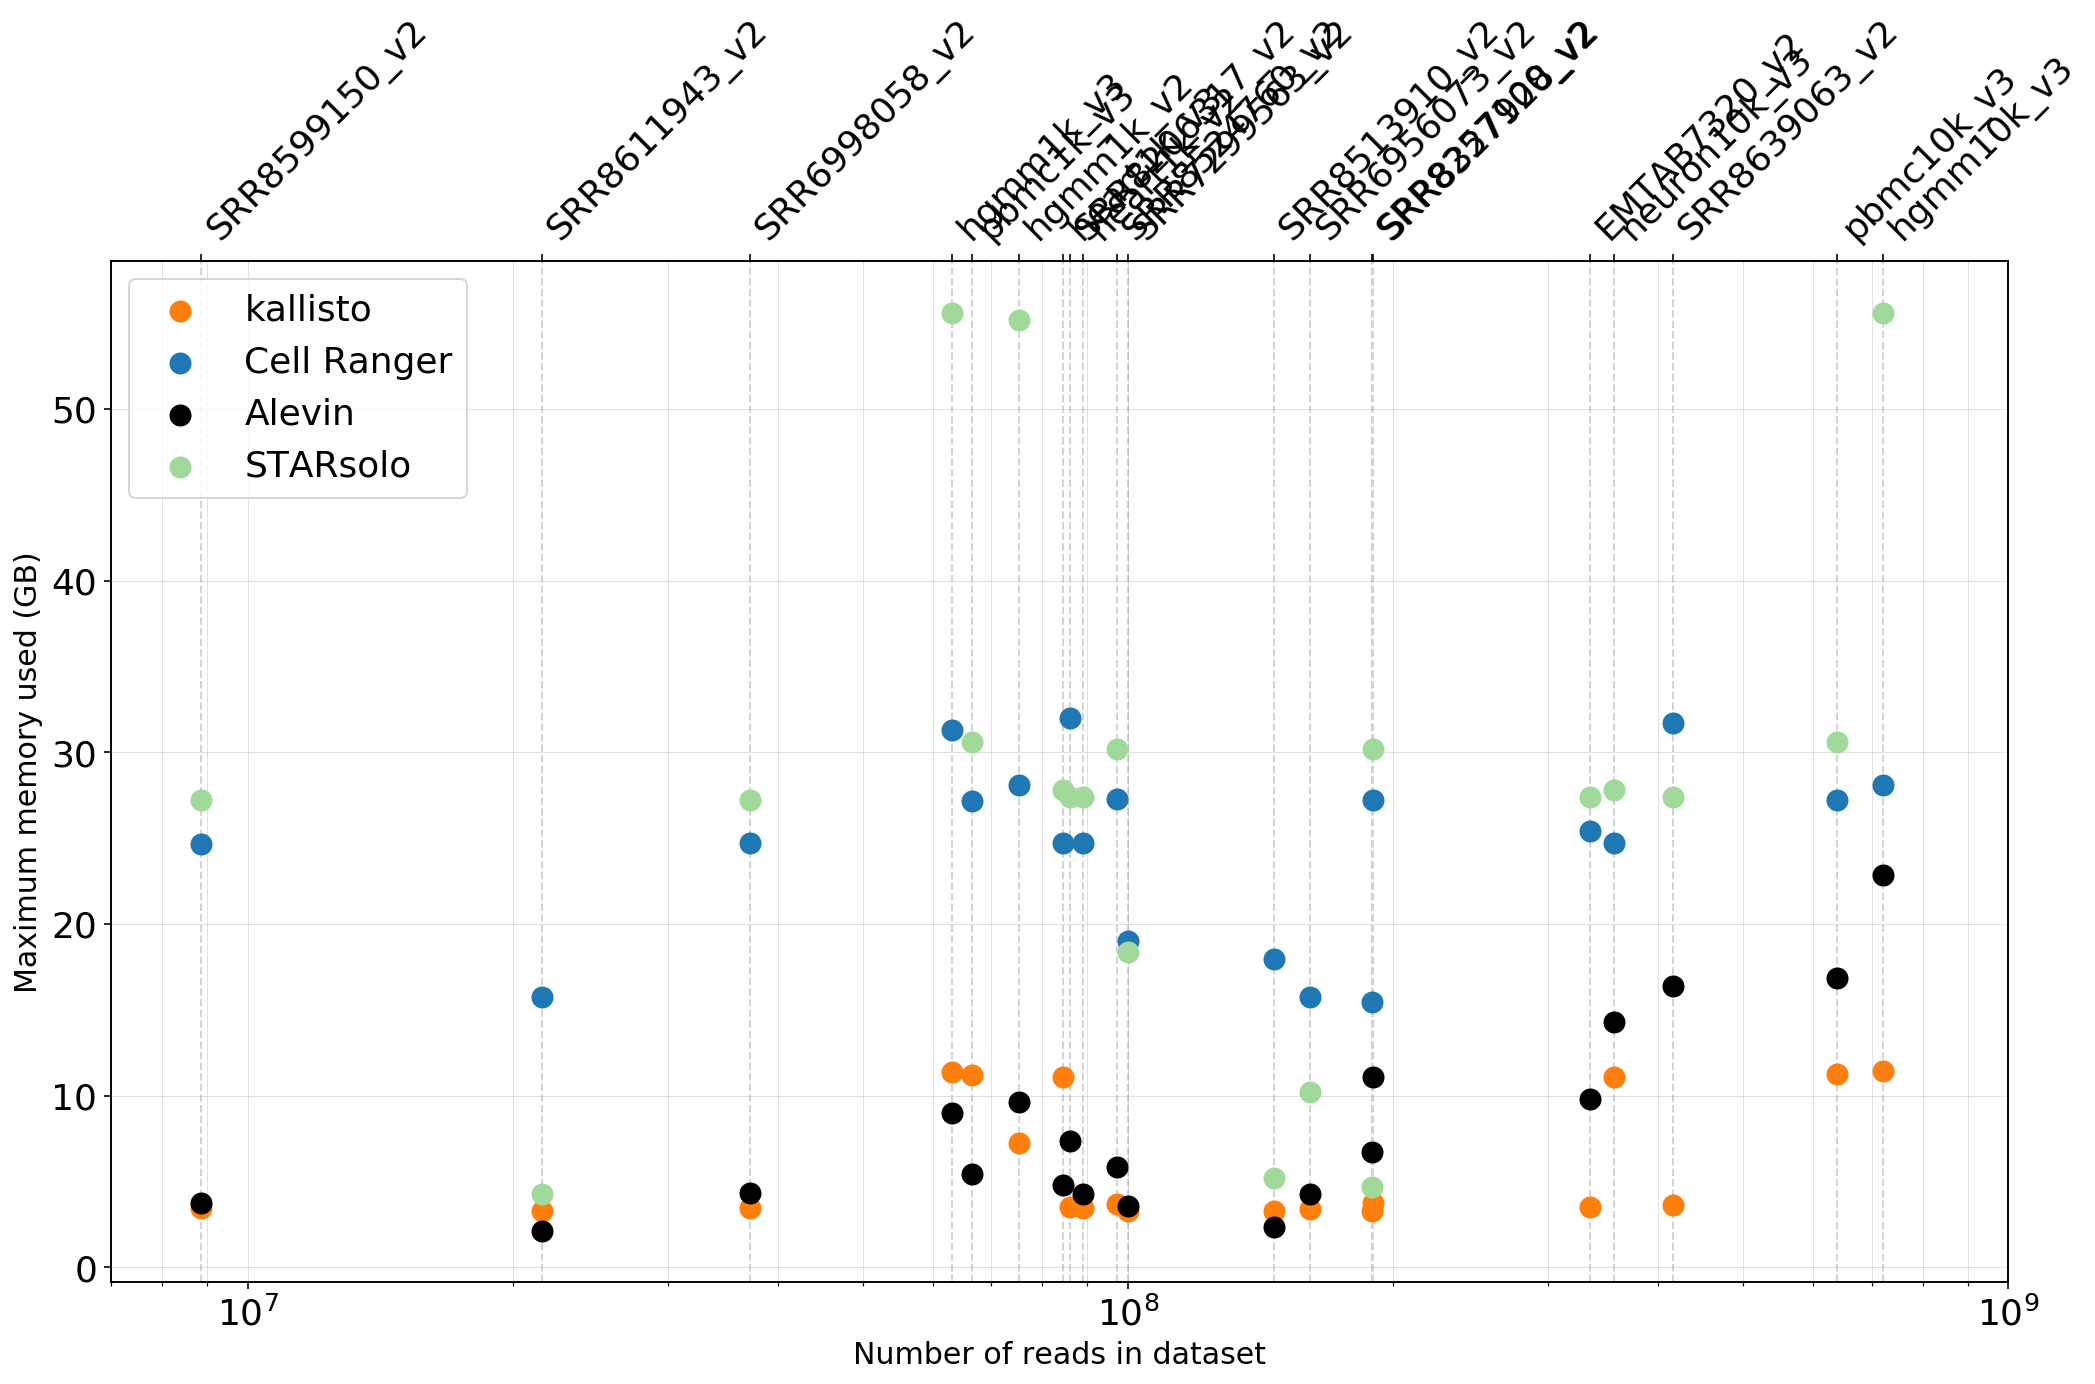

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
fsize= 15
kallisto_color = '#FF7F0E'
tenx_color = '#1F77B4'
star_color = '#a1d99b'
dotsize = 10
xmax = 1e5
gridalpha = 0.2
for nreads in kallisto['reads']:
    ax.axvline(x=nreads,linewidth=1, color='lightgrey', linestyle='--', zorder=1)


mem = "max_rss"

size = 100
ax.set_xscale('log')
ax.set_xlim(7e6,1e9) 
ax.set_yscale("linear", nonposy='clip')
ax.set_xlabel('Number of reads in dataset',fontsize=fsize)
ax.set_ylabel('Maximum memory used (GB)',fontsize=fsize)
ax.set_title('',loc='center')
# ax.set_title('E', fontweight='bold', fontsize = fsize, loc = 'left' )
ax.grid(color='dimgrey', linestyle='-', linewidth=0.5, which="both", alpha = gridalpha)

ax.scatter( kallisto['reads'], kallisto[mem]/1000, 
           label = 'kallisto', color = kallisto_color, zorder=2, s=size)

ax.scatter( cellranger['reads'], cellranger[mem]/1000, 
           label = 'Cell Ranger', color= tenx_color, zorder=2, s=size)

# ax.scatter( salmon_whitelist['reads'], salmon_whitelist[mem]/1000, 
#           label = 'Alevin (Salmon)', color= 'black', zorder=2)

ax.scatter( salmon_nowhitelist['reads'], salmon_nowhitelist[mem]/1000, 
            label = 'Alevin', color= 'black', zorder=2, s=size)

ax.scatter( star['reads'], star[mem]/1000, 
           label = 'STARsolo', color= star_color, zorder=2, s=size)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xscale('log')

ax2.set_xticks(ticks=kallisto['reads'])
ax2.set_xticklabels( labels=kallisto['ID'])
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("left")
    
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.legend()
plt.tight_layout()
plt.savefig('./max_memory_alevin_no_whitelist.pdf', dpi=300)

plt.show()


# RUNTIME

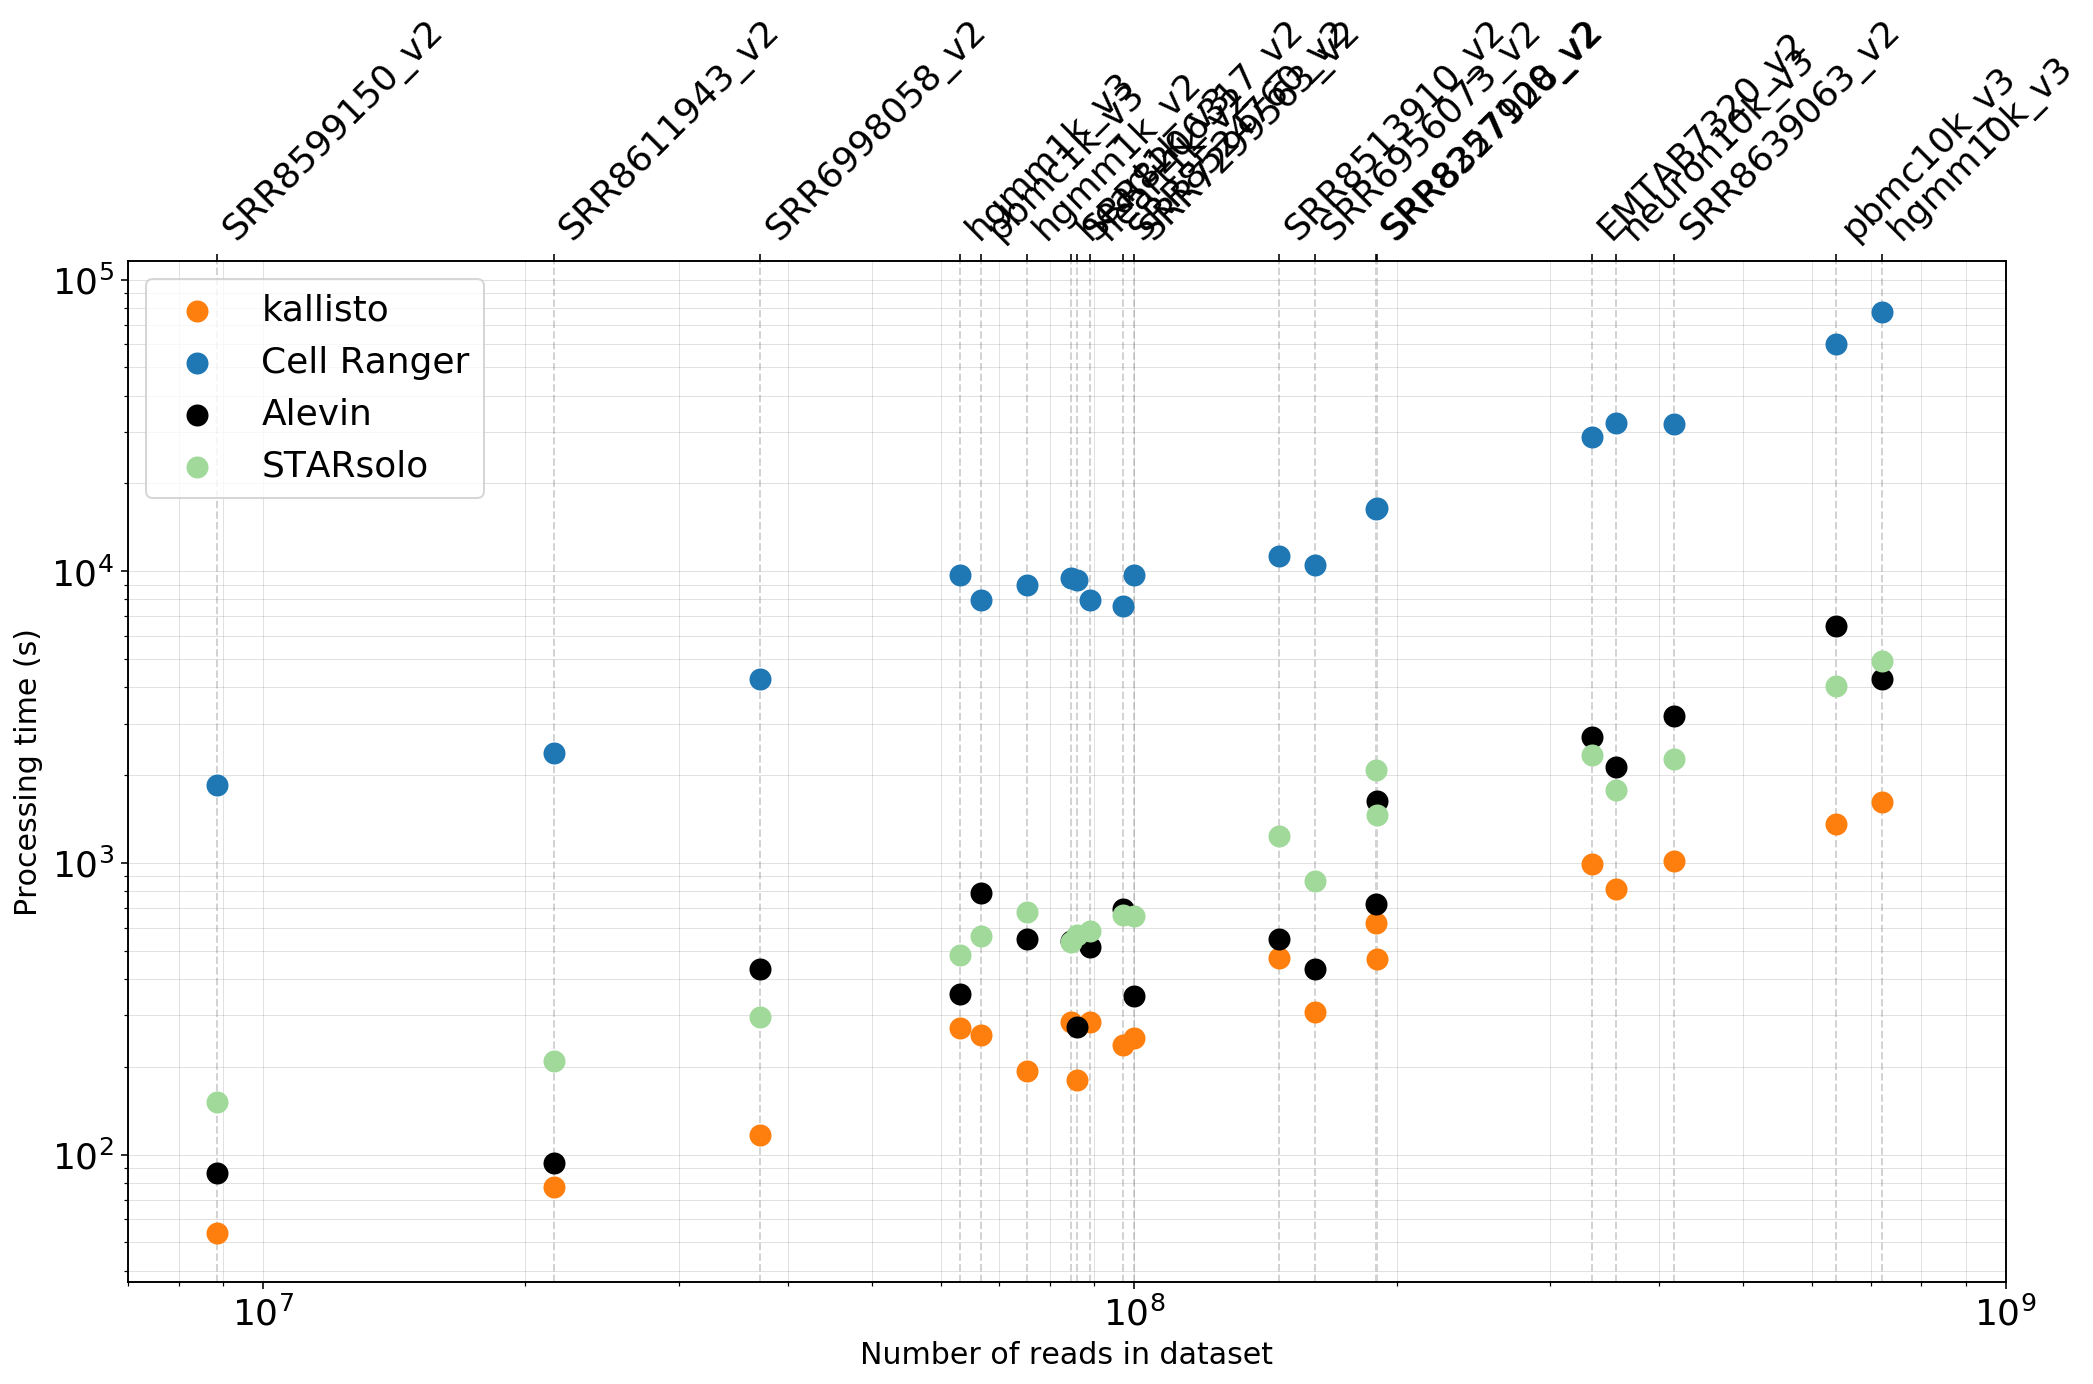

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
fsize= 15
kallisto_color = '#FF7F0E'
tenx_color = '#1F77B4'
star_color = '#a1d99b'

dotsize = 10
xmax = 1e5
gridalpha = 0.2
for nreads in kallisto['reads']:
    ax.axvline(x=nreads,linewidth=1, color='lightgrey', linestyle='--', zorder=1)


size=100

ax.set_xscale('log')
ax.set_xlim(7e6,1e9) 
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('Number of reads in dataset',fontsize=fsize)
ax.set_ylabel('Processing time (s)',fontsize=fsize)
ax.set_title('',loc='center')
# ax.set_title('E', fontweight='bold', fontsize = fsize, loc = 'left' )
ax.grid(color='dimgrey', linestyle='-', linewidth=0.5, which="both", alpha = gridalpha)

ax.scatter( kallisto['reads'], kallisto['s'], 
           label = 'kallisto', color = kallisto_color, zorder=2, s=size)

ax.scatter( cellranger['reads'], cellranger['s'], 
           label = 'Cell Ranger', color= tenx_color, zorder=2, s=size)

# ax.scatter( salmon_whitelist['reads'], salmon_whitelist['s'], 
#           label = 'Alevin (Salmon)', color= 'black', zorder=2)

ax.scatter( salmon_nowhitelist['reads'], salmon_nowhitelist['s'], 
            label = 'Alevin', color= 'black', zorder=2, s=size)

ax.scatter( star['reads'], star['s'], 
           label = 'STARsolo', color= star_color, zorder=2, s=size)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xscale('log')

ax2.set_xticks(ticks=kallisto['reads'])
ax2.set_xticklabels( labels=kallisto['ID'])
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("left")
    
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.legend()
plt.tight_layout()
plt.savefig('./runtimes_alevin_no_whitelist.pdf', dpi=300)
plt.show()
